In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# 1. Load Dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Display first few rows
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display dataset statistics
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000

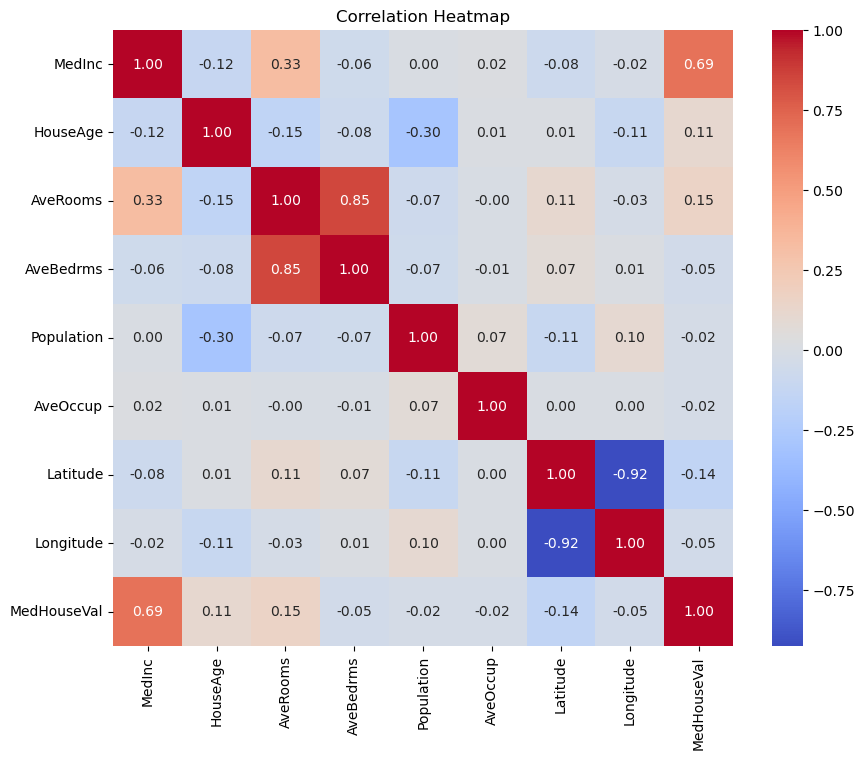

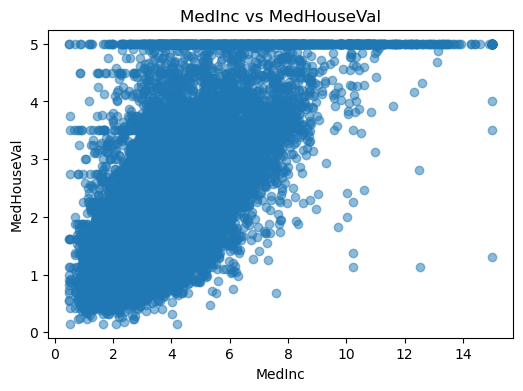

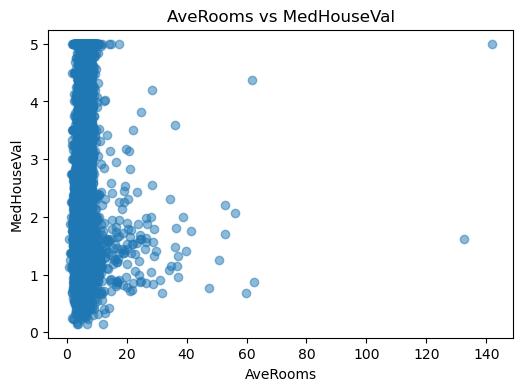

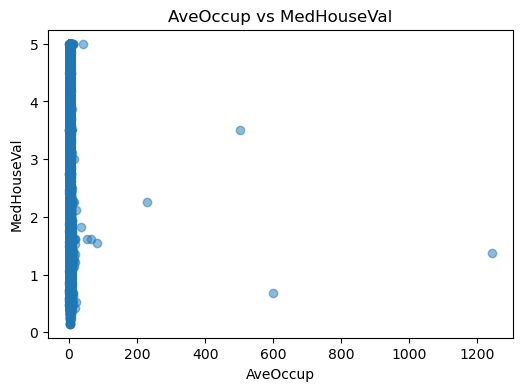

In [8]:
# 2. Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots: Choose top correlated features with the target
target = 'MedHouseVal'
features = ['MedInc', 'AveRooms', 'AveOccup']  # Replace based on EDA results
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[feature], data[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [10]:
# 3. Data Splitting and Preprocessing
X = data.drop(columns=[target])  # Features
y = data[target]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 4. Linear Regression Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [14]:
# 5. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.56
R-squared (R²): 0.58


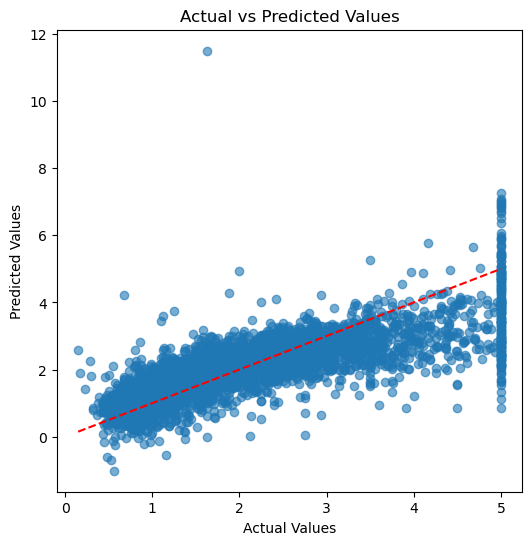

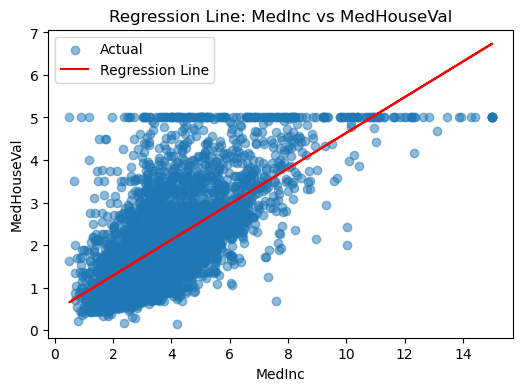

In [16]:
# 6. Visualization
# Actual vs Predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Regression line for single-feature analysis (e.g., 'MedInc')
single_feature = 'MedInc'
X_single = data[[single_feature]]
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)
y_pred_single = model_single.predict(X_test_single)

plt.figure(figsize=(6, 4))
plt.scatter(X_test_single, y_test_single, label='Actual', alpha=0.5)
plt.plot(X_test_single, y_pred_single, color='red', label='Regression Line')
plt.xlabel(single_feature)
plt.ylabel(target)
plt.title(f'Regression Line: {single_feature} vs {target}')
plt.legend()
plt.show()